In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
sns.set()

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['legend.loc'] = 'best'
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['legend.edgecolor'] = 'k'

## Plot fitness history

In [63]:
def bestpath():

    fig = plt.figure(figsize=[12, 12])
    
    case = 'MIN_TSP1'
    bestpath = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/n0/bestpath.csv', header=None)
    ax1 = fig.add_subplot(221)
    ax1.set_title('TSP1: The shortest path')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.plot(bestpath[0], bestpath[1], marker='.', linewidth=0.5)
    ax1.axis('equal')
    
    case = 'MAX_TSP1'
    bestpath = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/n0/bestpath.csv', header=None)
    ax2 = fig.add_subplot(222)
    ax2.set_title('TSP1: The longest path')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.plot(bestpath[0], bestpath[1], marker='.', linewidth=0.5)
    ax2.axis('equal')
    
    case = 'MIN_TSP2'
    bestpath = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/n0/bestpath.csv', header=None)
    ax3 = fig.add_subplot(223)
    ax3.set_title('TSP2: The shortest path')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.plot(bestpath[0], bestpath[1], marker='.', linewidth=0.5)
    ax3.axis('equal')
    
    case = 'MAX_TSP2'
    bestpath = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/n0/bestpath.csv', header=None)
    ax4 = fig.add_subplot(224)
    ax4.set_title('TSP2: The longest path')
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax4.plot(bestpath[0], bestpath[1], marker='.', linewidth=0.5)
    ax4.axis('equal')
    
    bestpath = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/n0/bestpath.csv', header=None)
        
    fig.tight_layout()
    plt.show()

In [73]:
def distribution(case, num, yrange):
    fig = plt.figure(figsize=[12, 6])

    ax1 = fig.add_subplot(121)
    ax1.set_title('Dot plot')
    ax1.set_xlabel('Number of evaluations')
    ax1.set_ylabel('fitness')

    history = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/' + num + '/history.csv', header=None)
    distrib = pd.read_csv('./Google Cloud Platform/' + case + '/tour_ox1_sim/' + num + '/distribution.csv', header=None)
    ax1.plot(history[0]*100, history[1], label='Best Fitness')
    ax1.plot(distrib[0]*100, distrib[1], label='Population', marker='.', linestyle='')
    ax1.legend(loc='best')
    #ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
    ax1.semilogx()

    ax2 = fig.add_subplot(122)
    ax2.set_title('Dot plot')
    ax2.set_xlabel('Number of evaluations')
    ax2.set_ylabel('fitness')

    ax2.plot(history[0]*100, history[1], label='Best Fitness')
    ax2.plot(distrib[0]*100, distrib[1], label='Population', marker='.', linestyle='')
    ax2.legend(loc='best')
    #ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
    ax2.semilogx()
    ax2.set_xlim([1e5, 1e8])
    ax2.set_ylim([yrange[0], yrange[1]])
    plt.show()

In [4]:
def convert(df):
    x = np.array(df.iloc[:, 0])
    y = np.array(df.iloc[:, 1])
    rslt_list = []
    inij = 0
    for i in np.arange(0, 50000000, 100):
        for j in range(inij, len(x)):
            if x[j] > i:
                rslt_list.append([i, y[j-1]])
                inij = j
                break
    return pd.DataFrame(rslt_list)

In [5]:
def add_statistics(df, num):
    mean = np.mean(1.0/df.iloc[:, 1:], axis=1)
    std = np.std(1.0/df.iloc[:, 1:], axis=1, ddof=1)/np.sqrt(num)*5.0

    add_df = pd.DataFrame(mean, columns=['ave']) 
    df = pd.concat([df, add_df], axis=1)

    add_df = pd.DataFrame(mean + std, columns=['err+']) 
    df = pd.concat([df, add_df], axis=1)

    add_df = pd.DataFrame(mean - std, columns=['err-']) 
    df = pd.concat([df, add_df], axis=1)

    return df

In [6]:
def draw_history(history):
    fig = plt.figure(figsize=[12, 6])

    ax1 = fig.add_subplot(111)
    ax1.set_title('Learning curves')
    ax1.set_xlabel('Number of evaluations')
    ax1.set_ylabel('Best Fitness')

    labels = ['Random', 
              'Hill climb', 
              'GA:RouletteWheel+SimpleVariation',
              'GA:Tournament+SimpleVariation',
              'GA:RouletteWheel+ImprovedVariation',
              'GA:Tournament+ImprovedVariation']
    
    cases = ['random', 
             'hillclimb', 
             'roul_oneptcx_ex',
             'tour_oneptcx_ex',
             'roul_ox1_sim',
             'tour_ox1_sim']
    
    for case, label in zip(cases, labels):
        x = history[case]['x']
        '''
        y = history[case]['n0']
        ax1.plot(x, y, label=label)
        y = history[case]['n1']
        ax1.plot(x, y, label=label)
        y = history[case]['n2']
        ax1.plot(x, y, label=label)
        y = history[case]['n3']
        ax1.plot(x, y, label=label)
        y = history[case]['n4']
        ax1.plot(x, y, label=label)
        '''
        
        ave = history[case]['ave']
        errp = history[case]['err+']
        errm = history[case]['err-']
        ax1.plot(x, ave, label=label)
        ax1.fill_between(x, errp, errm, alpha=0.3)
    ax1.semilogx()
    ax1.legend(loc='best')
    #ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
    plt.show()
    

In [7]:
def create_learning_curves(problem):
    cases = ['random', 'hillclimb', 'roul_oneptcx_ex', 'tour_oneptcx_ex', 'roul_ox1_sim', 'tour_ox1_sim']
    history={}
    num = 5

    for case in cases:

        for i in range(num):

            filename = './Google Cloud Platform/'+ problem + '/' + case + '/n'+ str(i) + '/history.csv'
            names = ['x', 'n' + str(i)]

            if i == 0:
                df = pd.read_csv(filename, header=None, names=names)
                if case == 'hillclimb':
                    df = convert(df)
                    df.columns = names
                else:
                    df.iloc[:, 0] = df.iloc[:, 0]*100
                    df = df[::1]
            else:
                add_df = pd.read_csv(filename, header=None, names=names)
                if case == 'hillclimb':
                    add_df = convert(add_df)
                    add_df.columns = names
                else:                          
                    add_df = add_df[::1]
                df = pd.concat([df, add_df.iloc[:, 1]], axis=1)
        df = add_statistics(df, num)
        history[case] = df
    draw_history(history)
    

# Best Paths

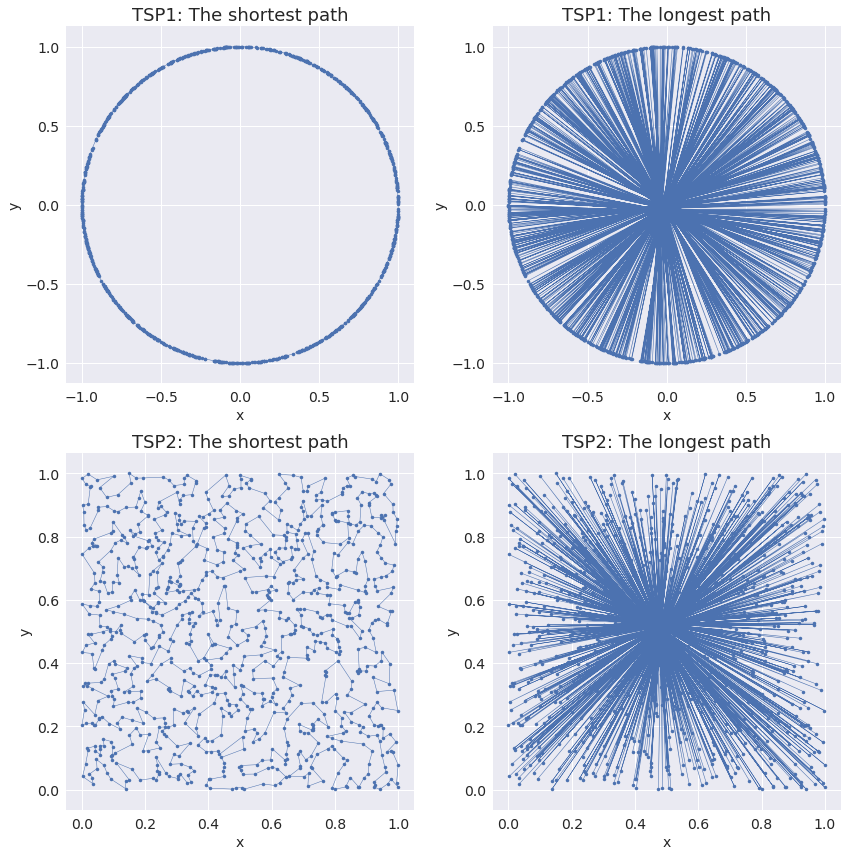

In [64]:
bestpath()

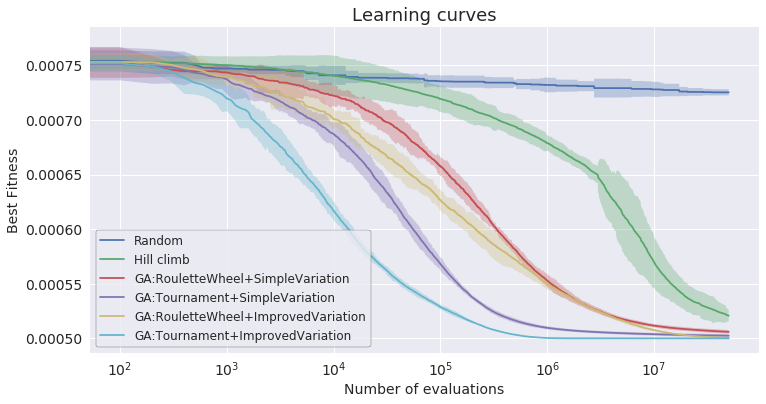

In [9]:
create_learning_curves('MAX_TSP1')

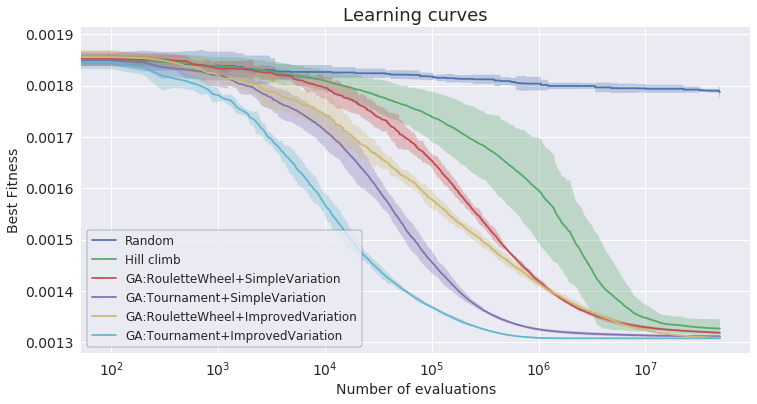

In [10]:
create_learning_curves('MAX_TSP2')

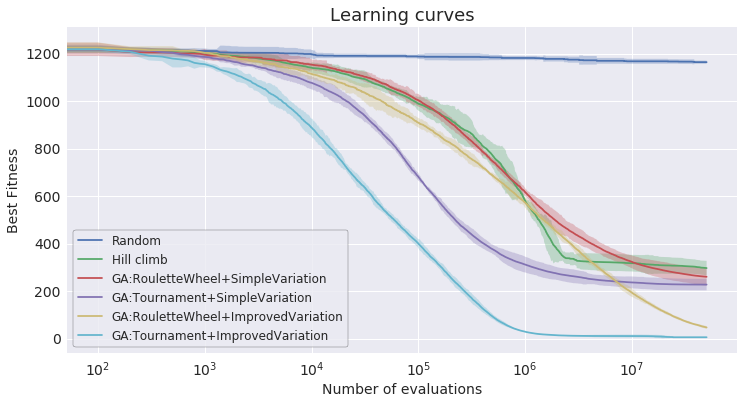

In [11]:
create_learning_curves('MIN_TSP1')

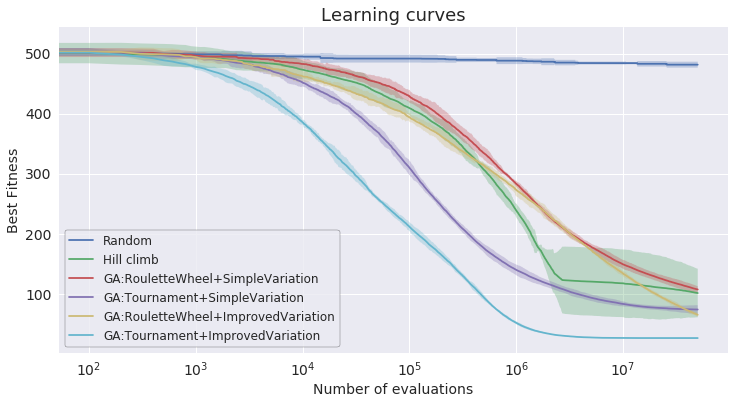

In [12]:
create_learning_curves('MIN_TSP2')

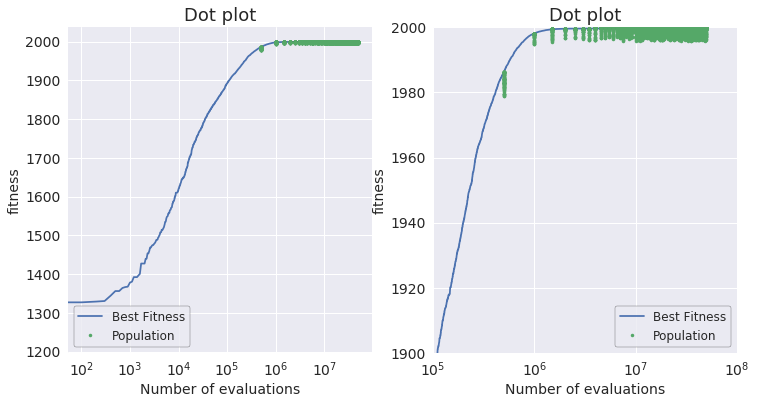

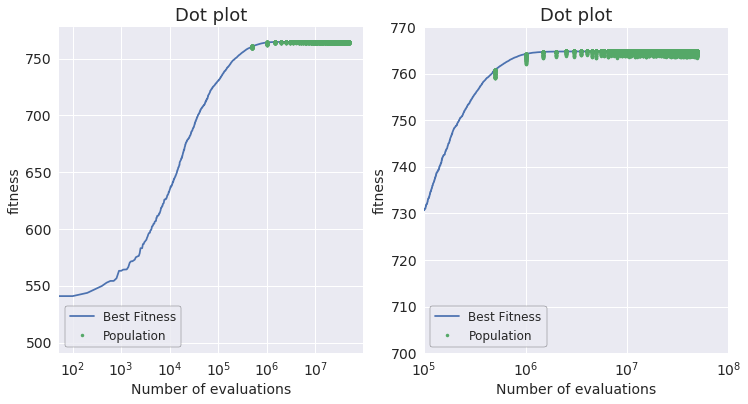

In [75]:
distribution('MAX_TSP1', 'n2', [1900, 2000])
distribution('MAX_TSP2', 'n0', [700, 770])

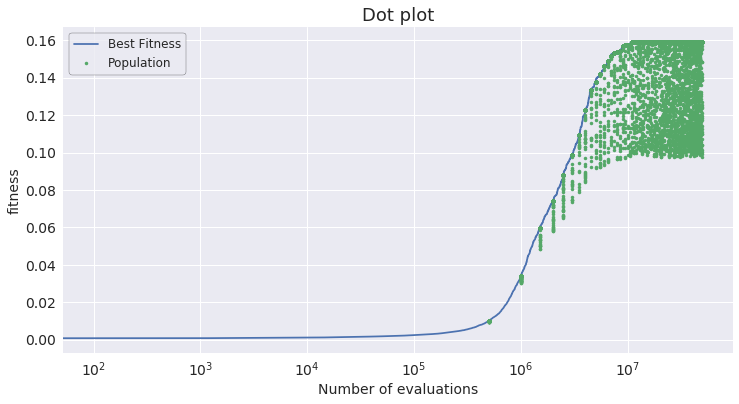

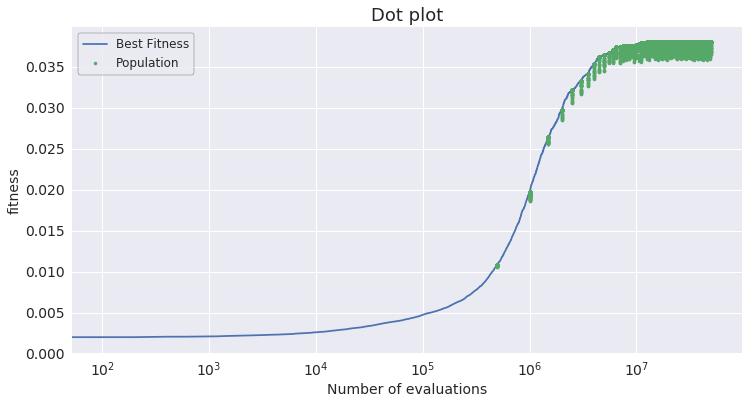

In [14]:
distribution('MIN_TSP1', 'n1')
distribution('MIN_TSP2', 'n4')

In [15]:
problems = ['MAX_TSP1', 'MAX_TSP2', 'MIN_TSP1', 'MIN_TSP2']
cases = ['random', 'hillclimb', 'roul_oneptcx_ex', 'tour_oneptcx_ex', 'roul_ox1_sim', 'tour_ox1_sim']
num = 5

rslt_table = []
for problem in problems:
    best = 0.0
    shortest = 1e8
    for case in cases:
        for i in range(num):
            filename = './Google Cloud Platform/'+ problem + '/' + case + '/n'+ str(i) + '/history.csv'
            df = pd.read_csv(filename, header=None)
            fitness = np.max(np.array(df[1]))
            ind = np.argmax(np.array(df[1])) * 100
            if fitness > best:
                best = fitness
                shortest = ind
                rslt = [case, i, ind, fitness]
            elif fitness == best and ind<shortest:
                best = fitness
                shortest = ind
                rslt = [case, i, ind, fitness]
    rslt_table.append(rslt)
    
rslt_table[2][3] = 1.0/rslt_table[2][3]
rslt_table[3][3] = 1.0/rslt_table[3][3]
df = pd.DataFrame(np.array(rslt_table)[:, 2:4], index=problems, columns=['Evaluations', 'Fitness'])

# Results summary table

In [16]:
df

,Evaluations,Fitness
MAX_TSP1,3540300,1999.56
MAX_TSP2,5140000,764.7669999999999
MIN_TSP1,15668800,6.283617352837681
MIN_TSP2,15113100,26.308104737826582


# Christofide's Algorithm

In [52]:
import christofides
points1 = np.array(pd.read_csv('./TSP1.txt', header=None))
length1, path1 = christofides.tsp(points1)
points2 = np.array(pd.read_csv('./TSP2.txt', header=None))
length2, path2 = christofides.tsp(points2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



MSTree:  [(49, 234, 0.0), (59, 152, 0.0), (127, 139, 0.0), (272, 463, 0.0), (288, 871, 0.0), (471, 536, 0.0), (827, 970, 0.0), (452, 508, 9.999999999998899e-05), (794, 813, 9.999999999998899e-05), (381, 839, 9.999999999999593e-05), (513, 745, 9.999999999999593e-05), (33, 415, 0.00010000000000000286), (230, 641, 0.00010000000000000286), (209, 424, 0.00010000000000001674), (38, 799, 0.00014142135623729392), (45, 386, 0.00014142135623729392), (59, 620, 0.00014142135623729392), (71, 570, 0.00014142135623729392), (148, 486, 0.00014142135623729392), (285, 838, 0.00014142135623729392), (344, 575, 0.00014142135623729392), (380, 476, 0.00014142135623729392), (560, 690, 0.00014142135623729392), (687, 815, 0.00014142135623729392), (368, 394, 0.00014142135623730373), (268, 993, 0.00014142135623733317), (621, 794, 0.00014142135623733317), (360, 545, 0.00019999999999999185), (42, 784, 0.00020000000000000573), (457, 605, 0.00020000000000000573), (353, 426, 0.00020000000000003348), (108, 782, 0.000223

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



MSTree:  [(352, 618, 0.0005385164807134941), (15, 141, 0.0015231546211727596), (484, 679, 0.001603121954188157), (279, 499, 0.0017029386365926395), (441, 923, 0.0018867962264113602), (288, 675, 0.0019697715603592156), (317, 885, 0.002024845673131636), (255, 691, 0.002280350850198257), (15, 174, 0.0024041630560342414), (410, 814, 0.0026019223662515282), (176, 400, 0.002729468812791261), (631, 686, 0.0027459060435492313), (110, 927, 0.003101612483854158), (764, 784, 0.003383784863137754), (274, 474, 0.0034655446902327035), (321, 891, 0.0034713109915418877), (930, 932, 0.003573513677041193), (320, 737, 0.0036235341863987036), (126, 562, 0.0036235341863987223), (286, 676, 0.003635931792539568), (712, 972, 0.003667424164178438), (81, 949, 0.003820994634908572), (574, 648, 0.003929376540877672), (294, 823, 0.004104875150354722), (81, 649, 0.004123105625617675), (45, 184, 0.004148493702538308), (170, 494, 0.004215447781671595), (359, 876, 0.004272001872658753), (200, 510, 0.004318564576337832

In [53]:
actual_path1 = np.array([points1[index] for index in path1])
actual_path2 = np.array([points2[index] for index in path2])

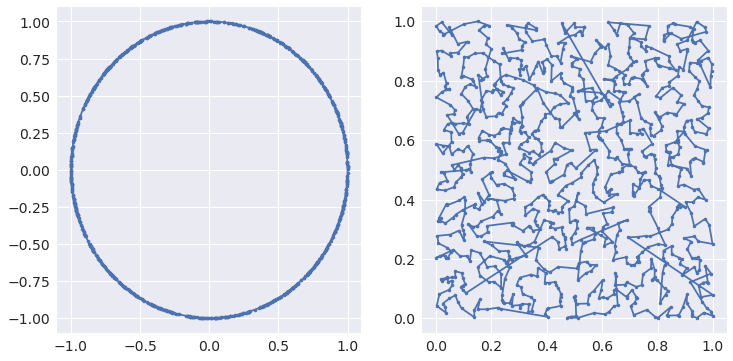

6.2836227793184305 28.284762826784007


In [56]:
fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(121)
ax1.plot(actual_path1[:, 0], actual_path1[:, 1], marker='.') 
ax2 = fig.add_subplot(122)
ax2.plot(actual_path2[:, 0], actual_path2[:, 1], marker='.') 
plt.show()
print(length1, length2)